# ECE4179 - Assignment\#1 
## Starter Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### define the sigmoid function below

In [2]:
def sigmoid(x):
    # this function should compute the sigmoid of x
    return 1/(1+np.exp(-x))

### use the sigmoid function and write a predictor for the logistic model below. 

In [3]:
def predict(X, theta):
    """
    this function should get X, an array of samples, and theta, the parameters
    of the logistic model and generate 0 or 1 as the label of each sample in X
    #the rule is that, if the sigmoid of x >= 0.5, we predict the label of x to be 1
    otherwise the label is 0
    """
    temp = np.dot(X,theta)
    val = np.where(sigmoid(temp)<0.5,0,1)
    return val
   

### write a function to compute the loss and gradient for the logistic model below

In [4]:
def compute_grad_loss(X, y, theta):
    #this function will get X, a set of samples (each sample is a row in X),
    #the corresponding labels in the array y and the current parameter of the logistic model theta
    #use the sigmoid function to compute the loss and the gradient of samples with respect to theta
  
    #when computing the loss value, pay extra attention to the log function. log(0) can cause problems so you need
    #to handle it
    row,_ = X.shape
    ## Add one small value to void log(0)
    val = 1e-20
    h = predict(X,theta)
    loss =-(np.sum(y*np.log(h+val)+(1-y)*np.log(1-h+val)))/row
    grad_vec =(np.dot(X.T,predict(X,theta)-y))
  
    return loss, grad_vec


### use this cell to load your data

In [5]:
# you can load your data using this cell

npzfile = np.load("toy_data.npz") # toy_data.npz or toy_data_two_circles.npz
#npzfile = np.load("toy_data_two_circles.npz")

X_train = npzfile['arr_0']
X_test = npzfile['arr_1']
y_train = npzfile['arr_2']
y_test = npzfile['arr_3']

## Decide which version 
bias = False
nonLinear = False

# remember that each row in X_train and X_test is a sample. so X_train[1,:] is the first training sample
rows_train,column_train = X_train.shape
rows_test,column_test = X_test.shape

# To put bias term in the model
X_train_bias = np.concatenate((X_train,np.ones((rows_train,1))),axis = 1)   # add x0=1 to each sample
X_test_bias = np.concatenate((X_test,np.ones((rows_test,1))),axis = 1)   # add x0=1 to each sample)


## Transform linear to nonlinear features
# Training Data
col1 = np.ones((rows_train,1))
col2 = np.ones((rows_train,1))
col3 = np.ones((rows_train,1))

col1[:,0]=(X_train[:,0]**2)
col2[:,0]=(X_train[:,1]**2)
col3[:,0]=(X_train[:,0]*X_train[:,1])

X_train_nonlinear=np.concatenate((X_train,col1),axis=1)
X_train_nonlinear=np.concatenate((X_train_nonlinear,col2),axis=1)
X_train_nonlinear=np.concatenate((X_train_nonlinear,col3),axis=1)
X_train_nonlinear = np.concatenate((X_train_nonlinear,np.ones((rows_train,1))),axis = 1)   # add x0=1 to each sample

# Test Data
col1 = np.ones((rows_test,1))
col2 = np.ones((rows_test,1))
col3 = np.ones((rows_test,1))

col1[:,0]=(X_test[:,0]**2)
col2[:,0]=(X_test[:,1]**2)
col3[:,0]=(X_test[:,0]*X_test[:,1])

# update the independent variales
X_test_nonlinear=np.concatenate((X_test,col1),axis=1)
X_test_nonlinear=np.concatenate((X_test_nonlinear,col2),axis=1)
X_test_nonlinear=np.concatenate((X_test_nonlinear,col3),axis=1)
X_test_nonlinear = np.concatenate((X_test_nonlinear,np.ones((rows_test,1))),axis = 1) # add bias to nonlinear function
if nonLinear == True:
    X_train = X_train_nonlinear
    X_test = X_test_nonlinear
elif bias == True:
    X_train = X_train_bias
    X_test = X_test_bias
else:
    X_train = X_train
    X_test = X_test

### you can plot the data using the cell below

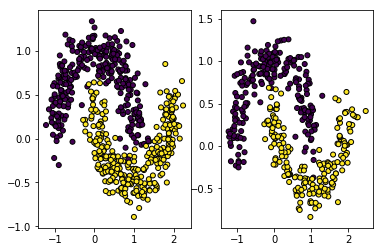

In [6]:
# this code will plot the data
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train[:,0], s=25, edgecolor='k')
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test[:,0], s=25, edgecolor='k')

### below you need to implement the gradient descent (GD) algorithm.

In [7]:
# theta is the parameters of the logistic model

# To learn them, we randomly initilize them below
theta = np.random.randn(X_train.shape[1],1)

#this is the learning rate of the GD algorithm, you need to tune this and study its effects in your report
lr = 0.01

# this is the maximum number of iterations of the GD algorithm. 
# Since we use the GD, each iteration of the algorithm is equivalent to one epoch, hence the name
max_epoch = 5000

loss = np.zeros(max_epoch) #keep track of the loss values for plotting
for epoch in range(max_epoch):
    # call the compute_grad_loss that you have implemented above to 
    # measure the loss and the gradient
    loss[epoch], grad_vec = compute_grad_loss(X_train, y_train, theta)
    #update the theta parameter according to the GD here
    theta -= lr*grad_vec

#print(theta)
#print()
#theta_best = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
#print(theta_best)    
#plt.plot(range(0,max_epoch),loss)


### Evaluate your trained model using the code below

0.815


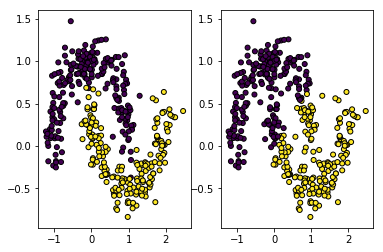

In [8]:
# now that you have trained your model, let's evaluate it 

# first call teh predict function on your test data with the parameters obtained by DG
y_test_hat = predict(X_test,theta)

# make sure that the predictions are either 0 or 1 and the shape of y_test_hat
# matches that ofy_test

# the script below, if the dimensionality of the arrays is set correctly,
# will measure how many samples are correctly classified by your model
score = float(sum(y_test_hat == y_test))/ float(len(y_test))
print(score)

# this code will plot the data and see how the line fits the dataset

plt.subplot(121)
plt.scatter(X_test_nonlinear[:, 0], X_test_nonlinear[:, 1], marker='o', c=y_test[:,0], s=25, edgecolor='k')
plt.subplot(122)
plt.scatter(X_test_nonlinear[:, 0], X_test_nonlinear[:, 1], marker='o', c=y_test_hat[:,0], s=25, edgecolor='k')
#plt.plot(range(-2,4),(range(-2,4)*theta[0,0]+theta[2,0])/-theta[1,0])
plt.show()